In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import mglearn
from matplotlib import pyplot as plt

In [6]:
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

n_features = 30

In [32]:
cancer.feature_names.shape

(30,)

-scaling 작업

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scale = scaler.transform(cancer.data)
X_scale

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [12]:
model_pca = PCA(n_components=2).fit(X_scale)

In [17]:
X_pca=model_pca.transform(X_scale)
X_pca.shape

(569, 2)

In [22]:
print('<n_features>')
print('before: {}\nafter: []'.format(X_scale.shape[1],
                                     X_pca.shape[1]))

<n_features>
before: 30
after: []


pca 결과 시각화

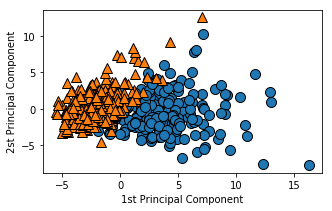

In [39]:
principal_component_names = ['1st Principal Component',
                            '2nd Principal Component']

plt.figure(figsize=(5,3))
mglearn.discrete_scatter (X_pca[:,0],X_pca[:, 1],
                         cancer.target)
plt.xlabel('1st Principal Component') #주석달기
plt.ylabel('2st Principal Component')
plt.show()

principal Components의 구성

In [40]:
model_pca.components_.shape

(2, 30)

각 component가 원본 데이터의 feature값을 얼마나 갖고 있는지에 대한 값

In [41]:
model_pca.components_[0]  #1st component의 구성요소, 얘가 30개!

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [42]:
model_pca.components_[0][0] #1st principal component에 기존 feature1이 0.2189만큼 들어있다는 뜻

0.21890244370000272

좀 더 확실한 이해를 위해 위의 수치를 heatmap으로 나타내보자.

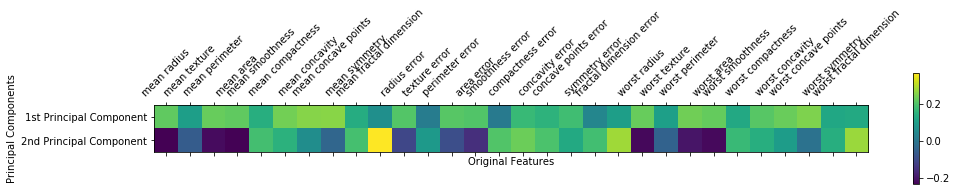

In [43]:

plt.matshow(model_pca.components_)

#x 좌표 출력
plt.xticks(range(len(cancer.feature_names)), 
           cancer.feature_names,
          rotation=45)

#y 좌표 출력
plt.yticks(range(len(model_pca.components_)),
           principal_component_names)

#color의 수치값 
plt.colorbar()  #진할수록 -가 강함

#x축 y축 labeling
plt.xlabel('Original Features')
plt.ylabel('Principal Components')

plt.show()